# Step 1 & 2
### 1. Load the Dataset:
• Import the Gapminder dataset into a Pandas DataFrame.
### 2. Data Merging:
• Convert from wide to long, if necessary.

• Merge different parameters such as gdp, population, life expectancy, and so on.

***Note: I'm quite sure there is a less messy and easier way to do this but after many trial and error sequences, this worked out and honestly I did not have the energy in me to optimize it.***

In [3]:
import numpy as np
import pandas as pd

root_path = f"/Users/cem/Desktop/KU/SOCI354/Assignments/Assignment 2 Datasets"

gdp_data = pd.read_csv(root_path+'/gdp_pcap.csv')
life_expectancy_data = pd.read_csv(root_path+'/life expectancy.csv')
population_data = pd.read_csv(root_path+'/population.csv')

gdp_data = gdp_data.set_index("country")
life_expectancy_data = life_expectancy_data.set_index("country")
population_data = population_data.set_index("country")

gdp_data = gdp_data.stack()
gdp_data = gdp_data.rename("GDP")


life_expectancy_data = life_expectancy_data.stack()
life_expectancy_data = life_expectancy_data.rename("Life expectancy")

population_data = population_data.stack()
population_data = population_data.rename("Population")

my_df = pd.concat([population_data, life_expectancy_data, gdp_data], axis=1)
my_df


Population  Life expectancy    GDP
country                                            
Afghanistan 1800      3.28M             28.2    599
            1801      3.28M             28.2    599
            1802      3.28M             28.2    599
            1803      3.28M             28.2    599
            1804      3.28M             28.2    599
...                     ...              ...    ...
Zimbabwe    2096      35.5M             73.9  10.8k
            2097      35.5M             74.0    11k
            2098      35.6M             74.2  11.3k
            2099      35.6M             74.3  11.6k
            2100      35.6M             74.4  11.9k

[59197 rows x 3 columns]

# Step 3

### 3. Data Cleaning and Preparation:
• Identify and handle missing values in the dataset.

***The most logical option I believe was forward fill, so I did that.***

• Rename columns if necessary to make them more descriptive (e.g., rename 'pop' to 'Population').**(I did this in the prior step)**

In [4]:
nan_count = my_df.isna().sum().sum()

# Counting total values
total_count = my_df.size

print("Number of NaN values:", nan_count)
print("Total number of values:", total_count)

my_df_wout_nans = my_df.ffill(axis=0)
print(my_df_wout_nans.isna().sum().sum())  # Print again to see if everything seems fine

Number of NaN values: 3083
Total number of values: 177591
0


# Step 4
### 4. Data Exploration:
• Display the first and last 5 rows of the dataset.

• Identify the number of unique countries represented in the dataset.

• Extract data for a specific year (e.g., 2000) and create a new DataFrame.

In [7]:
print(my_df_wout_nans.iloc[:5]) # Display the first 5 rows
print(my_df_wout_nans.iloc[-5:,:]) # Display the last 5 rows

my_df_wout_nans.index.set_names('year', level=1, inplace=True)

my_df_2000 = my_df_wout_nans.loc[my_df_wout_nans.index.get_level_values('year') == '2000']

countries = [i[0] for i in my_df_2000.index]
print(len(countries))  # Prints out how many unique countries there are (197)

                 Population  Life expectancy  GDP
country     year                                 
Afghanistan 1800      3.28M             28.2  599
            1801      3.28M             28.2  599
            1802      3.28M             28.2  599
            1803      3.28M             28.2  599
            1804      3.28M             28.2  599
              Population  Life expectancy    GDP
country  year                                   
Zimbabwe 2096      35.5M             73.9  10.8k
         2097      35.5M             74.0    11k
         2098      35.6M             74.2  11.3k
         2099      35.6M             74.3  11.6k
         2100      35.6M             74.4  11.9k
197


# Step 5

### 5. Data Filtering:
• Select all data related to a continent of your choice (e.g., Africa).
***Because the data did not have continents included in the datapoints, I asked ChatGPT to give me a Python list of all the countries in Europe (double-checked that the length of the list matched my Google search on how many countries there were in Europe) and used that list as my reference point in the filtering operation. I excluded Kosovo and Vatican City as they did not show up in the list of countries in the DataFrame. I achieved that by the following code:***


In [9]:
EUROPEAN_COUNTRY_LIST = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina",
    "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia",
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Latvia", "Liechtenstein",
    "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway",
    "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "Ukraine", "UK"
]
countries = [i[0] for i in my_df_2000.index]

for country in EUROPEAN_COUNTRY_LIST:
    if country not in countries:
        print(country)
        
# Also changed the name of 'United Kingdom' and 'Slovakia' to fit how they were coded in the DataFrame ('UK' and 'Slovak Republic')

# Step 5 (cont.)

• Filter out countries with a population less than 1 million.

***I converted the string type numbers to float with respect to their suffixes (k, M, B) and then filtered out the data both for the 'European' condition and '>1M' condition at the same time***

In [13]:
def str_to_float_with_suffix(s):
    if type(s) == str:
        if s[-1] == 'k':
            return float(s[:-1]) * 1000
        elif s[-1] == 'M':
            return float(s[:-1]) * 1000000

        elif s[-1] == 'B':
            return float(s[:-1]) * 1000000000
        else:
            return float(s)
    else:
        return float(s)

my_df_wout_nans['Population'] = my_df_wout_nans['Population'].apply(str_to_float_with_suffix)
my_df_wout_nans['GDP'] = my_df_wout_nans['GDP'].apply(str_to_float_with_suffix)

my_df_2000 = my_df_wout_nans.loc[my_df_wout_nans.index.get_level_values('year') == '2000']


# Apply this to the broader DataFrame as it will come as useful in the questions that will folllow

# Filtering here:
filtered_df = my_df_2000[(my_df_2000.index.get_level_values(0).isin(EUROPEAN_COUNTRY_LIST)) & (my_df_2000['Population'] > 1000000)]
filtered_df


,,Population,Life expectancy,GDP
country,year,,,
Albania,2000,3180000.0,75.4,6020.0
Armenia,2000,3170000.0,72.4,4290.0
Austria,2000,8010000.0,78.5,46900.0
Azerbaijan,2000,8190000.0,66.5,4240.0
Belgium,2000,10300000.0,78.0,43700.0
Bulgaria,2000,8100000.0,70.2,10700.0
Bosnia and Herzegovina,2000,4180000.0,75.5,7220.0
Belarus,2000,10300000.0,69.0,8620.0
Switzerland,2000,7180000.0,80.3,59500.0


# Step 6

### 6. Data Organization:
• Sort the dataset based on life expectancy in ascending order.

In [14]:
filtered_df = filtered_df.sort_values(by='Life expectancy')
filtered_df

# The lowest possible value is 64.7 and highest is 80.3

,,Population,Life expectancy,GDP
country,year,,,
Kazakhstan,2000,15200000.0,64.7,10700.0
Russia,2000,147000000.0,65.6,14600.0
Azerbaijan,2000,8190000.0,66.5,4240.0
Ukraine,2000,48900000.0,68.0,7480.0
Moldova,2000,4250000.0,68.9,4890.0
Belarus,2000,10300000.0,69.0,8620.0
Bulgaria,2000,8100000.0,70.2,10700.0
Latvia,2000,2390000.0,70.7,13400.0
Georgia,2000,4270000.0,70.7,5170.0


# Step 6 (cont.)

• Create a new column that categorizes countries into 'High', 'Medium', or 'Low'

***Because there was no clear cut definition as to what would count as high, medium, or low, I simply took the mean value of life expectancy ages in the year 2000 for all countries and subtracted one standard deviation for the lower limit and added one standard deviation for the upper limit***

In [15]:
life_exp_mean = round(my_df_2000["Life expectancy"].mean(),2)
life_exp_std = round(my_df_2000["Life expectancy"].std(),2)
print(f"Lower limit: {life_exp_mean-life_exp_std} \nUpper limit: {life_exp_mean+life_exp_std}")

# Lower limit: 58.08 
# Upper limit: 77.24

filtered_df['Life Expectancy Category'] = pd.cut(filtered_df['Life expectancy'], bins=[0, life_exp_mean-life_exp_std, life_exp_mean+life_exp_std, float('inf')] , labels=['Low', 'Medium', 'High'])
filtered_df


Lower limit: 58.08 
Upper limit: 77.24


,,Population,Life expectancy,GDP,Life Expectancy Category
country,year,,,,
Kazakhstan,2000,15200000.0,64.7,10700.0,Medium
Russia,2000,147000000.0,65.6,14600.0,Medium
Azerbaijan,2000,8190000.0,66.5,4240.0,Medium
Ukraine,2000,48900000.0,68.0,7480.0,Medium
Moldova,2000,4250000.0,68.9,4890.0,Medium
Belarus,2000,10300000.0,69.0,8620.0,Medium
Bulgaria,2000,8100000.0,70.2,10700.0,Medium
Latvia,2000,2390000.0,70.7,13400.0,Medium
Georgia,2000,4270000.0,70.7,5170.0,Medium


# Step 7

### 7. Basic Data Analysis:
• Calculate the average GDP per capita for each continent.

• Identify the country with the highest life expectancy in a given year.

***Because continent information was not present in the dataset, I only did this for Europe which I had already filtered out. I calculated the average GDP for each year and the country with the highest life expectancy for that year and stored those in a dictionary for further use***

***I must also note this part took a lot of trial and error so some things I suppose could be optimized or rewritten for readability purposes but I did not dare try that. As long as it is working, I feel content with it.***

In [17]:
df_europe = my_df_wout_nans[my_df_wout_nans.index.get_level_values(0).isin(EUROPEAN_COUNTRY_LIST)]

info_dict = {}
for year in range (1800,2101):
    average_gdp = df_europe[df_europe.index.get_level_values('year') == str(year)]["GDP"].mean()
    this_year = df_europe.loc[df_europe.index.get_level_values('year') == str(year)]
    highest_life_exp_this_year = this_year[this_year.index.get_level_values('year') == str(year)]["Life expectancy"].max()
    country_w_highest_life_exp = this_year[this_year["Life expectancy"] == highest_life_exp_this_year].index[0][0]
    info_dict[year] = {"Average GDP": round(average_gdp,2),
                        "Country with the highest life expectancy": country_w_highest_life_exp}

# A selection of keys:    
print(info_dict[1811])
print(info_dict[1917])
print(info_dict[2006])
print(info_dict[2089])

{'Average GDP': 2905.86, 'Country with the highest life expectancy': 'San Marino'}
{'Average GDP': 5376.12, 'Country with the highest life expectancy': 'San Marino'}
{'Average GDP': 37293.88, 'Country with the highest life expectancy': 'Liechtenstein'}
{'Average GDP': 72520.41, 'Country with the highest life expectancy': 'Iceland'}


# Step 8
### 8. Data Visualization:
• Use basic plotting functions in Pandas (e.g., plot, bar) to visualize the trends in life expectancy over the years for a selected country.

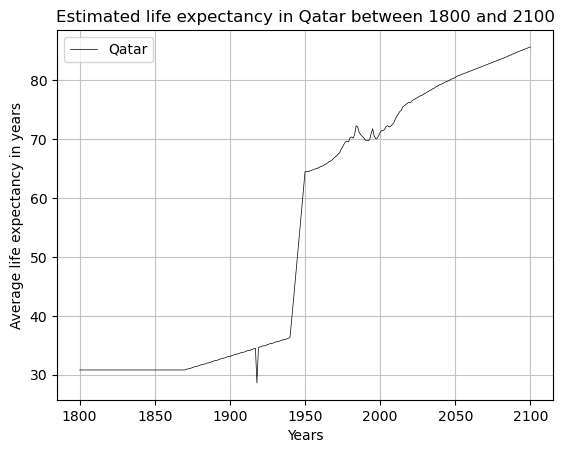

In [18]:
import matplotlib.pyplot as plt

#Create a new dataframe where only a single country's information is stored
qatar_df = my_df_wout_nans.loc[my_df_wout_nans.index.get_level_values('country') == 'Qatar']

#Obtain years for the x-axis and associated life expectancy values for the y-axis
years_for_graph = [int(year[1]) for year in qatar_df.index]
life_expectancy_for_graph = qatar_df["Life expectancy"].tolist()

# Plot a line graph where a solid thin black line graphs the association 
plt.plot(years_for_graph, life_expectancy_for_graph, 'k-', label='Qatar', linewidth=.5)

#Label the graph for better readability
plt.xlabel('Years')
plt.ylabel('Average life expectancy in years')
plt.title("Estimated life expectancy in Qatar between 1800 and 2100")

# Show the legend and add a grid is a faded gray for better UX
plt.legend()
plt.grid(True, color='#c2c2c2')

#Execute this line to display the final version of the graph
plt.show()